In [46]:
import os
import matplotlib.pyplot as plt
from tensorboard.backend.event_processing import event_accumulator

# Path to your TensorBoard logs
log_dir = "D:/Major/PSR/retinexformer-env/Retinexformer/tb_logger/RetinexFormer_LOL_v1"



# Load events
ea = event_accumulator.EventAccumulator(log_dir)
ea.Reload()  # Load all events


In [47]:
# Available tags
print("Available tags:", ea.Tags())


Available tags: {'images': [], 'audio': [], 'histograms': [], 'scalars': ['losses/l_pix', 'metrics/psnr', 'metrics/ssim', 'metrics/best_iter', 'metrics/best_psnr', 'metrics/best_ssim'], 'distributions': [], 'tensors': [], 'graph': False, 'meta_graph': False, 'run_metadata': []}


In [48]:
def extract_scalar(tag):
    events = ea.Scalars(tag)
    steps = [e.step for e in events]
    values = [e.value for e in events]
    return steps, values


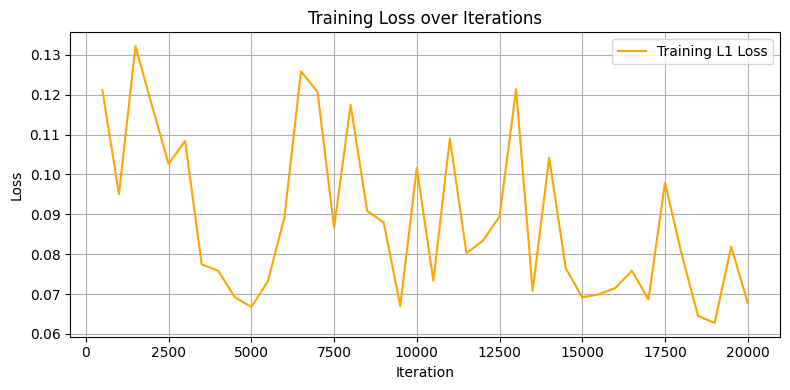

In [49]:
# --- Training Loss ---
if 'losses/l_pix' in ea.Tags()['scalars']:
    steps, loss = extract_scalar('losses/l_pix')
    plt.figure(figsize=(8,4))
    plt.plot(steps, loss, color='orange', label='Training L1 Loss')
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.title('Training Loss over Iterations')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

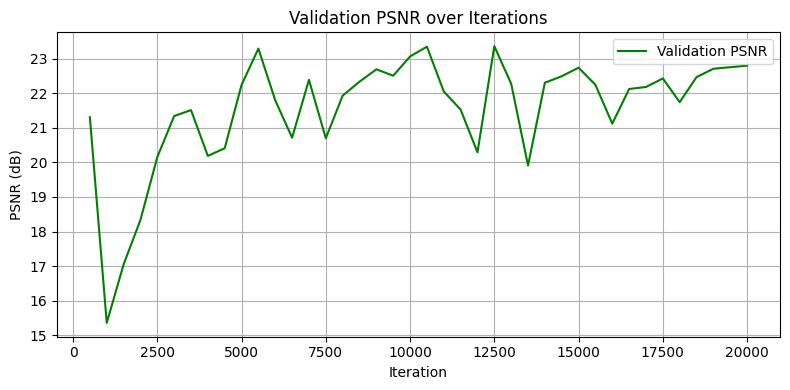

In [50]:
# --- Validation PSNR ---
if 'metrics/psnr' in ea.Tags()['scalars']:
    steps, psnr = extract_scalar('metrics/psnr')
    plt.figure(figsize=(8,4))
    plt.plot(steps, psnr, color='green', label='Validation PSNR')
    plt.xlabel('Iteration')
    plt.ylabel('PSNR (dB)')
    plt.title('Validation PSNR over Iterations')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

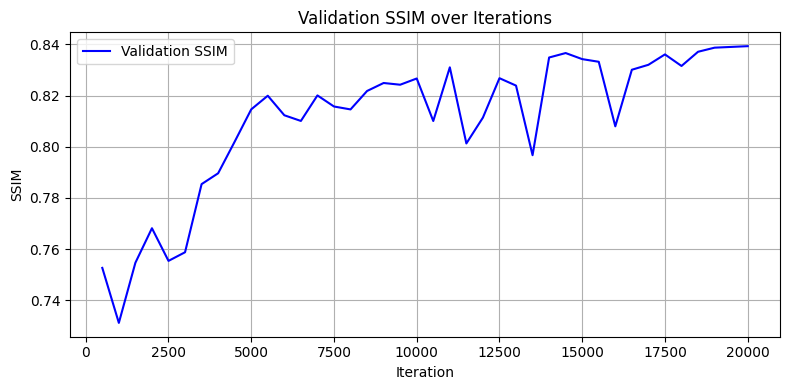

In [51]:
# --- Validation SSIM ---
if 'metrics/ssim' in ea.Tags()['scalars']:
    steps, ssim = extract_scalar('metrics/ssim')
    plt.figure(figsize=(8,4))
    plt.plot(steps, ssim, color='blue', label='Validation SSIM')
    plt.xlabel('Iteration')
    plt.ylabel('SSIM')
    plt.title('Validation SSIM over Iterations')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()